In [1]:
import numpy as np
import pandas as pd

In [ ]:
# res: https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

In [2]:
rating_data = pd.read_csv('/Users/pliu/Downloads/ml-latest-small/ratings.csv')
print(rating_data.shape)
rating_data.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movie_names = pd.read_csv('/Users/pliu/Downloads/ml-latest-small/movies.csv')
print(movie_names.shape)
movie_names.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# merge
movie_data = pd.merge(rating_data, movie_names, on='movieId')
print(movie_data.shape)
movie_data.head()

(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
# calculate average rating for each movie
move_rating = pd.DataFrame(movie_data.groupby(['title'])['rating'].mean())
move_rating['rating_counts'] = pd.DataFrame(movie_data.groupby(['title'])['rating'].count())
move_rating.sort_values(by = ['rating_counts', 'rating'], ascending=False).head(5)

,rating,rating_counts
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


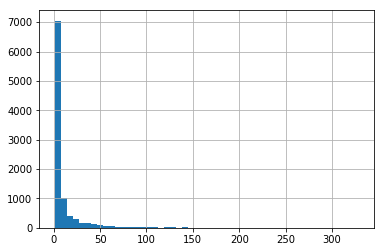

In [17]:
# check distribution of count of ratings
move_rating['rating_counts'].hist(bins=50);
# most of the movies receive less than 50 ratings

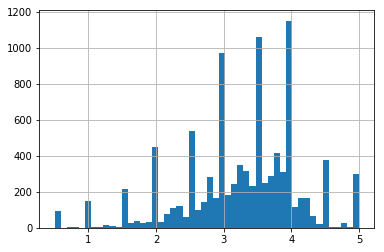

In [18]:
# check distribution of value of ratings
move_rating['rating'].hist(bins=50);
# int values are more frequently assigned by the user
# a weak normal distribution where mean is 3.5
# outliers exist

In [19]:
# joint plot
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 576x432 with 0 Axes>

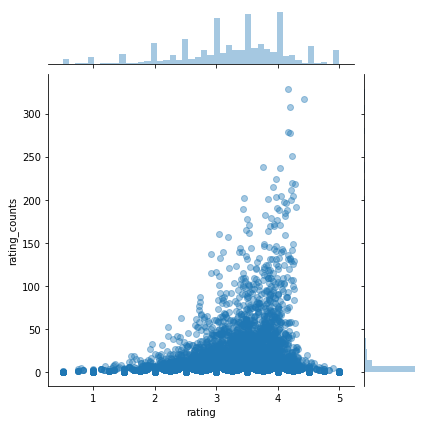

In [22]:
plt.figure(figsize=(8,6))
sns.jointplot(x='rating', y='rating_counts', data=move_rating,alpha=0.4);

<Figure size 576x432 with 0 Axes>

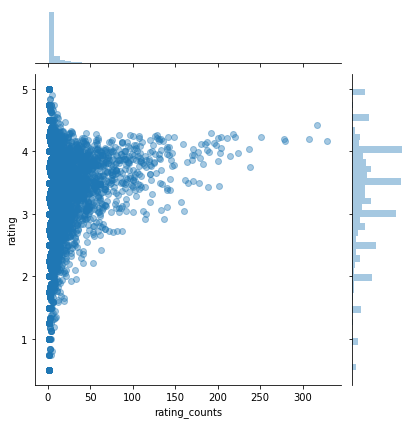

In [23]:
plt.figure(figsize=(8,6))
sns.jointplot(x='rating_counts', y='rating', data=move_rating,alpha=0.4);

In [24]:
# create matrix of user(r) - item(c)
# use pd.DataFrame.pivot_table()
user_moving_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_moving_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# find correlation btw movies have a higher num of ratings
# example: Forrest Gump (1994)
ratings_forest = user_moving_rating['Forrest Gump (1994)']
print(ratings_forest.mean())
ratings_forest.head()


4.164133738601824


userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [34]:
movies_like_forest = user_moving_rating.corrwith(ratings_forest)

corr_forest = pd.DataFrame(movies_like_forest, columns=['Correlation'])
corr_forest = corr_forest.join(move_rating['rating_counts'])
corr_forest.dropna(inplace=True)
corr_forest[corr_forest.rating_counts>50].sort_values(ascending=False, by ='Correlation').head(10)

# correlation alone is not a good metric for similarity

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53
